In [ ]:
## tf.keras.layers.Conv2D Option : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# filters : filter 개수 / kernal_size : convolution filter size, integer : 3 , tuple : (3,3), list : [3,3] 가능 
# padding : "valid" or "same"  - valid : padding X , - same : stride 1 기준, 입력과 출력의 size가 같아지도록, 더 자세한 건 위의 링크 참고

# data_format : channels_last(Default) : (batch, height, width, channels) / if channels_first : (batch, channels, height, width)
# use_bias : bias 사용 여부
# kernel_initializer, kernel_regularizer : initialzier and regularizer(L2 regularizer 등..) for kernel weights matrix
# bias_initializer . bias_regularizer

In [ ]:
# kernel dimension : 4D / (height, width, in_channel, out_channel) / 만약 실제로 값을 지정해서 넣어주고 싶은 경우 data_format shape 순서와 다르다는 것 유의

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# toy image

image =  tf.constant([[[[1],[2],[3]],
                       [[4],[5],[6]],
                       [[7],[8],[9]]]], dtype = np.float32)

# maybe.. 1*3*3*1? 

In [ ]:
image.shape
# batch, height, width, channels

TensorShape([1, 3, 3, 1])

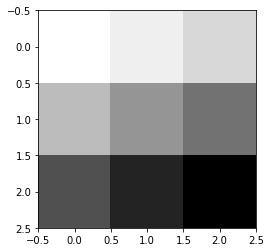

In [ ]:
plt.imshow(image.numpy().reshape(3,3), cmap = 'Greys')
plt.show()

In [ ]:
# filter : 2*2*1*1 / (height, width, in_channel, out_channel)
weight = np.array([[[[1]],[[1]]],
                   [[[1]],[[1]]]], dtype = np.float32)

print(weight.shape)

(2, 2, 1, 1)


In [ ]:
# numph practice 2*3*2*1

a = np.array([[[[1],[1]],
           [[1],[1]],
           [[1],[1]]],
           [[[1],[1]],
           [[1],[1]],
           [[1],[1]]]])

print(a.shape)

(2, 3, 2, 1)


In [ ]:
weight_init = tf.constant_initializer(weight)

In [ ]:
conv2d = keras.layers.Conv2D(filters = 1, kernel_size = 2, padding = 'VALID',
                             kernel_initializer = weight_init)(image) # filter : 2*2 > kernel_size = 2

conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


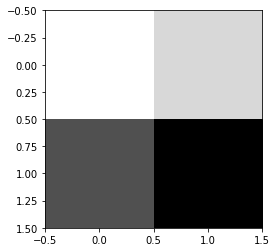

In [ ]:
print("conv2d.shape",conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap = 'Greys')
plt.show()

In [ ]:
## padding > same 으로 바꾸기 / output size : 3*3 이길 바라며..
conv2d = keras.layers.Conv2D(filters = 1, kernel_size = 2, padding = 'SAME',
                             kernel_initializer = weight_init)(image) # filter : 2*2 > kernel_size = 2

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


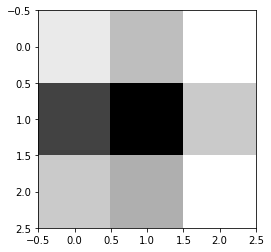

In [ ]:
print("conv2d.shape",conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap = 'Greys')
plt.show()

In [ ]:
## 3 filters : (2,2,1,3)

weight = np.array([[[[1,10,-1]],
                    [[1,10,-1]]],
                   [[[1,10,-1]],
                    [[1,10,-1]]]], dtype = np.float32)


# filter 1 : value 1로 채워진 2*2 size filter / filter 2 : value 10으로 채워진 2*2 filter
print(weight.shape)

(2, 2, 1, 3)


In [ ]:
weight_init = tf.constant_initializer(weight)

In [ ]:
conv2d = keras.layers.Conv2D(filters = 3, kernel_size = 2, padding = 'SAME',
                             kernel_initializer = weight_init)(image)  # filter 개수 : 3

In [ ]:
print(conv2d.shape)

(1, 3, 3, 3)


In [ ]:
feature_maps = np.swapaxes(conv2d, 0, 3)
print(feature_maps.shape)

(3, 3, 3, 1)


In [ ]:
for i, feature_map in enumerate(feature_maps) :
  print(i,feature_map)


0 [[[12.]
  [16.]
  [ 9.]]

 [[24.]
  [28.]
  [15.]]

 [[15.]
  [17.]
  [ 9.]]]
1 [[[120.]
  [160.]
  [ 90.]]

 [[240.]
  [280.]
  [150.]]

 [[150.]
  [170.]
  [ 90.]]]
2 [[[-12.]
  [-16.]
  [ -9.]]

 [[-24.]
  [-28.]
  [-15.]]

 [[-15.]
  [-17.]
  [ -9.]]]


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


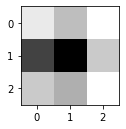

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


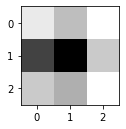

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


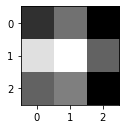

In [ ]:
for i, feature_map in enumerate(feature_maps) :
  print(feature_map.reshape(3,3))
  plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='Greys')

  plt.show()


In [ ]:
conv2d

<tf.Tensor: shape=(1, 3, 3, 3), dtype=float32, numpy=
array([[[[ 12., 120., -12.],
         [ 16., 160., -16.],
         [  9.,  90.,  -9.]],

        [[ 24., 240., -24.],
         [ 28., 280., -28.],
         [ 15., 150., -15.]],

        [[ 15., 150., -15.],
         [ 17., 170., -17.],
         [  9.,  90.,  -9.]]]], dtype=float32)>

In [ ]:
feature_maps

array([[[[ 12.],
         [ 16.],
         [  9.]],

        [[ 24.],
         [ 28.],
         [ 15.]],

        [[ 15.],
         [ 17.],
         [  9.]]],


       [[[120.],
         [160.],
         [ 90.]],

        [[240.],
         [280.],
         [150.]],

        [[150.],
         [170.],
         [ 90.]]],


       [[[-12.],
         [-16.],
         [ -9.]],

        [[-24.],
         [-28.],
         [-15.]],

        [[-15.],
         [-17.],
         [ -9.]]]], dtype=float32)